In [6]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'data/train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


[Text(0.5, 1.0, 'Survivors by Sex'),
 Text(0.5, 0, 'Sex'),
 Text(0, 0.5, 'Total')]

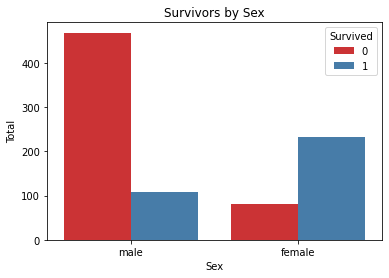

In [10]:
ax = sns.countplot(x='Sex', hue='Survived', palette='Set1', data=df)
ax.set(title='Survivors by Sex', xlabel='Sex', ylabel='Total')

Correcting data

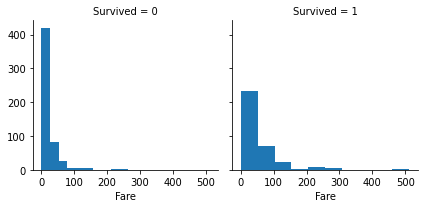

In [9]:
graph = sns.FacetGrid(df, col="Survived")
graph.map(plt.hist, 'Fare', bins=10)

In [10]:
#remove outliers for dataset - change to median

df.loc[df['Fare']>400, 'Fare'] = df['Fare'].median()

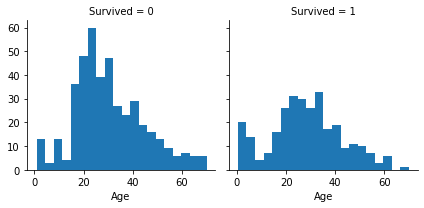

In [14]:
graph_age = sns.FacetGrid(df, col="Survived")
graph_age.map(plt.hist, 'Age', bins=20)

In [13]:
df.loc[df['Age'] > 70, 'Age'] = 70

In [27]:
#check for nulls
for column in df:
    print(column, ": ", df[column].isnull().sum())

PassengerId :  0
Survived :  0
Pclass :  0
Name :  0
Sex :  0
Age :  0
SibSp :  0
Parch :  0
Ticket :  0
Fare :  0
Cabin :  687
Embarked :  0


In [26]:
#full nulls
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].value_counts().index[0], inplace=True)

Feature Engineering

In [38]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0]
    else:
        return 'No title in Name'

df['Title'] = df['Name'].apply(get_title)

df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)

In [48]:
df['Sex'].replace(('male', 'female'), (0,1), inplace=True)
df['Embarked'].replace(('S', 'C', 'Q'), (0,1,2), inplace=True)

df.drop('Title', axis=1, inplace=True)

Machine learning

In [50]:
corr = df.corr()
corr['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex            0.543351
Age           -0.065880
SibSp         -0.035322
Parch          0.081629
Fare           0.259289
Embarked       0.106811
Name: Survived, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

X = df.drop(['Survived', 'PassengerId'], axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [61]:
rf = RandomForestClassifier()
rf.fit(x_train.values, y_train)
y_pred=rf.predict(x_test.values)
acc_rf = round(accuracy_score(y_pred, y_test)*100, 2)
print(acc_rf)

85.82


In [62]:
pickle.dump(rf, open('titanic_model.sav', 'wb'))

In [63]:
import pickle

def prediction_model(pclass, sex, age, sibsp, parch, fare, embarked):
    x = [[pclass, sex, age, sibsp, parch, fare, embarked]]
    rf = pickle.load(open('titanic_model.sav', 'rb'))
    prediction = rf.predict(x)
    return prediction

In [60]:
prediction_model(1,1,11,1,1,19,1)

array([1], dtype=int64)